In [1]:
import pandas as pd

In [47]:
pd.read_csv("http://bit.ly/drinksbycountry", nrows=10).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [2]:
drinks = pd.read_csv("http://bit.ly/drinksbycountry")

## Memory usage | Optimize

In [3]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [4]:
drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 30.4 KB


In [5]:
drinks.memory_usage(deep=True)

Index                              80
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                       12332
dtype: int64

In [7]:
drinks.memory_usage(deep=True).sum() # matches 30.4KB above

31176

In [49]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

### Categorical columns

In [9]:
# Notice that continent has only a few unique values and can be better represented as 
# integers as strings occupy more memory as copared to strings

In [11]:
drinks['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [13]:
drinks['continent'] = drinks['continent'].astype('category')

In [14]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [16]:
drinks.dtypes

country                           object
beer_servings                      int64
spirit_servings                    int64
wine_servings                      int64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object

In [17]:
drinks.memory_usage(deep=True) # see that memory of continent has come down from 12KB to 744B

Index                              80
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         744
dtype: int64

##### Ordered Categorical Columns

In [19]:
df = pd.DataFrame({'ID':[1,2,3,4], 'Quality':['good', 'excellent', 'bad', 'very good']})

In [20]:
df

,ID,Quality
0,1,good
1,2,excellent
2,3,bad
3,4,very good


In [21]:
df['Quality'] = df['Quality'].astype('category', categories=['bad', 'good', 'very good', 'excellent'], ordered=True)

c:\mysoftwares\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


In [25]:
df.Quality

0         good
1    excellent
2          bad
3    very good
Name: Quality, dtype: category
Categories (4, object): [bad < good < very good < excellent]

In [24]:
df[df['Quality'] >= 'good']

,ID,Quality
0,1,good
1,2,excellent
3,4,very good


## General stuff

In [50]:
drinks.describe(include=['int64'])

,beer_servings,spirit_servings,wine_servings
count,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777
std,101.143103,88.284312,79.697598
min,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000
50%,76.000000,56.000000,8.000000
75%,188.000000,128.000000,59.000000
max,376.000000,438.000000,370.000000


In [51]:
drinks.describe(include='all')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
count,193,193.000000,193.000000,193.000000,193.000000,193
unique,193,NaN,NaN,NaN,NaN,6
top,Japan,NaN,NaN,NaN,NaN,Africa
freq,1,NaN,NaN,NaN,NaN,53
mean,NaN,106.160622,80.994819,49.450777,4.717098,NaN
std,NaN,101.143103,88.284312,79.697598,3.773298,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,20.000000,4.000000,1.000000,1.300000,NaN
50%,NaN,76.000000,56.000000,8.000000,4.200000,NaN
75%,NaN,188.000000,128.000000,59.000000,7.200000,NaN


In [52]:
drinks.mean()

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [53]:
drinks.mean(axis=1).shape

(193,)

In [54]:
drinks.mean(axis=0).shape

(4,)

## Playing with dtypes

In [55]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [56]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [57]:
drinks["beer_servings"] = drinks.beer_servings.astype(float)

In [58]:
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [59]:
drinks = pd.read_csv("http://bit.ly/drinksbycountry", dtype={"beer_servings" : float})

In [60]:
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [61]:
orders = pd.read_table("http://bit.ly/chiporders")

In [62]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [63]:
orders.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [64]:
# Note the dtype of item_price is string
orders.item_price.str.replace('$', '').head()

0     2.39 
1     3.39 
2     3.39 
3     2.39 
4    16.98 
Name: item_price, dtype: object

In [65]:
orders.item_price.str.replace('$', '').astype(float).mean()

7.464335785374297

In [66]:
orders.item_price = orders.item_price.str.replace('$', '').astype(float)
orders.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

## GroupBy

In [67]:
# GroupBy is same as 'foreach'

In [14]:
drinks = pd.read_csv("http://bit.ly/drinksbycountry")

In [15]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [16]:
drinks[drinks["continent"] == 'Africa'].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,Africa
4,Angola,217,57,45,5.9,Africa
18,Benin,34,4,13,1.1,Africa
22,Botswana,173,35,35,5.4,Africa
26,Burkina Faso,25,7,7,4.3,Africa


In [72]:
drinks[drinks["continent"] == 'Africa'].beer_servings.mean()

61.471698113207545

In [73]:
drinks[drinks["continent"] == 'Asia'].beer_servings.mean()

37.04545454545455

In [76]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [17]:
drinks.groupby('continent').beer_servings.agg(['count', 'min', 'max', 'mean'])

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [18]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


## Plots

In [19]:
%matplotlib inline

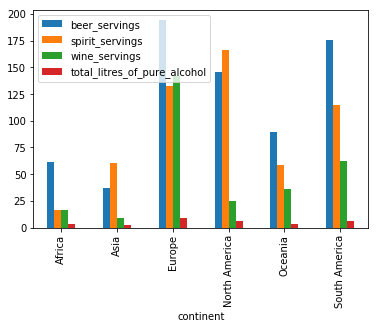

In [20]:
drinks.groupby('continent').mean().plot(kind='bar')

In [19]:
import matplotlib

In [3]:
matplotlib.__version__

'3.0.2'

In [4]:
matplotlib.__file__

'c:\\mysoftwares\\python37\\lib\\site-packages\\matplotlib\\__init__.py'

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'position')

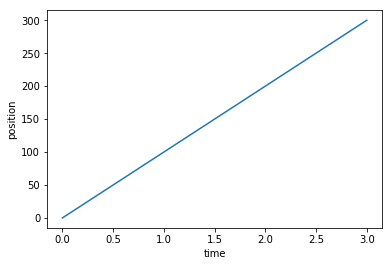

In [10]:
time = [0,1,2,3]
position = [0, 100, 200, 300]
plt.plot(time,position)
plt.xlabel("time")
plt.ylabel("position")

In [3]:
movies = pd.read_csv("http://bit.ly/imdbratings")

In [6]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


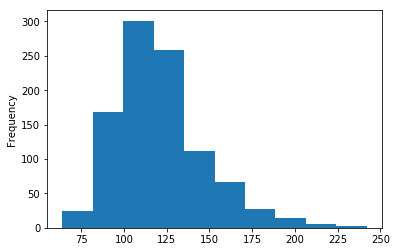

In [21]:
movies.duration.plot(kind="hist")

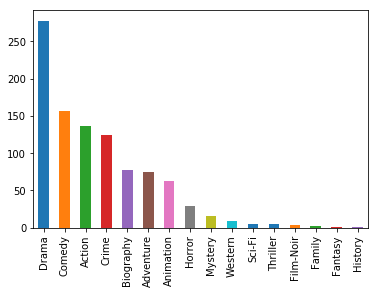

In [27]:
movies.genre.value_counts().plot.bar() # same as plot(kind="bar")

## Value_Counts

In [9]:
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [10]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [11]:
movies.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Sci-Fi       0.005107
Thriller     0.005107
Film-Noir    0.003064
Family       0.002043
Fantasy      0.001021
History      0.001021
Name: genre, dtype: float64

In [12]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [13]:
movies.genre.nunique()

16

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
ufo = pd.read_csv("http://bit.ly/uforeports")
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [4]:
pd.to_datetime(ufo.Time).head() # Note the dtype = datetime64

0   1930-06-01 22:00:00
1   1930-06-30 20:00:00
2   1931-02-15 14:00:00
3   1931-06-01 13:00:00
4   1933-04-18 19:00:00
Name: Time, dtype: datetime64[ns]

In [6]:
ufo['Time'] = pd.to_datetime(ufo.Time)

In [7]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [9]:
ufo.Time.dt.year.head()

0    1930
1    1930
2    1931
3    1931
4    1933
Name: Time, dtype: int64

In [10]:
ufo['Year'] = ufo.Time.dt.year

In [11]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


In [13]:
ufo.Year.value_counts().head()

1999    2774
2000    2635
1998    1743
1995    1344
1997    1237
Name: Year, dtype: int64

In [15]:
# sort by index instead of value
ufo.Year.value_counts().sort_index().head()

1930    2
1931    2
1933    1
1934    1
1935    1
Name: Year, dtype: int64

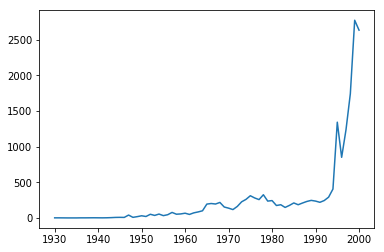

In [16]:
# Plot the above count by year
ufo.Year.value_counts().sort_index().plot() # by default does a line plot

## CrossTab

In [14]:
pd.crosstab(movies.genre, movies.star_rating)

star_rating,7.4,7.5,7.6,7.7,7.8,7.9,8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9.0,9.1,9.2,9.3
genre,,,,,,,,,,,,,,,,,,,,
Action,4,10,25,18,21,11,10,12,4,7,4,3,2,2,2,0,1,0,0,0
Adventure,7,6,6,5,9,5,12,7,2,8,3,1,0,1,2,1,0,0,0,0
Animation,2,4,6,8,9,6,9,4,5,3,3,2,1,0,0,0,0,0,0,0
Biography,3,8,12,8,11,9,6,8,5,2,1,1,1,1,0,1,0,0,0,0
Comedy,15,14,23,25,20,9,12,14,8,4,6,3,3,0,0,0,0,0,0,0
Crime,4,20,13,15,12,9,8,15,7,3,8,2,2,2,0,1,0,1,1,1
Drama,12,34,30,29,28,21,32,36,16,12,11,7,3,4,1,2,0,0,0,0
Family,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fantasy,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
